In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustris_python as il
import os


#For comparing
old_cat_path = "../data/tng-100-3/output"


In [2]:
def load_old_cat(path):
    subhalo_fields = ["SubhaloMass", 'SubhaloMassType', "SubhaloMassInHalfRadType", "SubhaloHalfmassRadType", "SubhaloPos", "SubhaloVel",               "SubhaloSpin"]
    df = il.pandasformat.dict_to_pandas(il.groupcat.loadSubhalos(old_cat_path, 99, fields=subhalo_fields))
    return df

In [3]:
def create_cat(path):
    df = pd.DataFrame()
    for filename in os.listdir(path):
        temp = pd.read_pickle(path + filename)
        df_temp = pd.concat([df, temp])
        df_temp = df_temp.sort_values(by="id") 
        df = df_temp.reset_index(drop=True)
    return df

In [4]:
#old_cat = load_old_cat(old_cat_path)
test_name1 = "idun_3296132"
new_cat_path_1 = "../data/tng-100-1/catalogues/test_runs/" + test_name1 + "/"
test_name2 = "idun_3359723"
new_cat_path_2 = "../data/tng-100-1/catalogues/test_runs/" + test_name2 + "/"
old_cat = create_cat(new_cat_path_1)
new_cat = create_cat(new_cat_path_2)
print(new_cat.keys())
print(old_cat.keys())

Index(['id', 'SubhaloGalaxyRad', 'SubhaloRad', 'SubhaloPosX', 'SubhaloPosY',
       'SubhaloPosZ', 'SubhaloMassStellar', 'SubhaloVelX', 'SubhaloVelY',
       'SubhaloVelZ', 'SubhaloHalfmassRadStellar', 'RotationAxisX',
       'RotationAxisY', 'RotationAxisZ', 'SubhaloMassGas', 'SubhaloMassDm',
       'SubhaloMassTotal'],
      dtype='object')
Index(['id', 'SubhaloGalaxyRad', 'SubhaloRad', 'SubhaloPosX', 'SubhaloPosY',
       'SubhaloPosZ', 'SubhaloMassStellar', 'SubhaloVelX', 'SubhaloVelY',
       'SubhaloVelZ', 'SubhaloHalfmassRadStellar', 'RotationAxisX',
       'RotationAxisY', 'RotationAxisZ', 'SubhaloMassGas', 'SubhaloMassDm',
       'SubhaloMassTotal'],
      dtype='object')


In [13]:
indices = new_cat["id"]
print("Masses check")
#for i in range(10):
    #print("Old: ", old_cat["SubhaloMassStellar"][i], " New: ", new_cat["SubhaloMassStellar"][i])
for i in range(70, 90):
    print("Old: ", old_cat["SubhaloMassDm"][i], " New: ", new_cat["SubhaloMassDm"][i])

Masses check
Old:  210.6910099999591  New:  210.6910099999591
Old:  179.09969451279835  New:  179.09969451279835
Old:  295.9561150940547  New:  295.9561150940547
Old:  196.2133844471899  New:  196.2133844471899
Old:  248.31635471509512  New:  248.31635471509512
Old:  205.71160875435135  New:  205.71160875435135
Old:  106.23177674163365  New:  106.23177674163365
Old:  269.38818581629175  New:  269.38818581629175
Old:  145.0320761216893  New:  145.0320761216893
Old:  136.0510543197829  New:  136.0510543197829
Old:  274.524315093795  New:  274.524315093795
Old:  196.27203106557658  New:  196.27203106557658
Old:  99.6092590326057  New:  99.6092590326057
Old:  165.96993003433013  New:  165.96993003433013
Old:  156.83167462623183  New:  156.83167462623183
Old:  215.59710297258349  New:  215.59710297258349
Old:  126.20095030230131  New:  126.20095030230131
Old:  192.66576960909165  New:  192.66576960909165
Old:  226.08979192083643  New:  226.08979192083643
Old:  158.38581001347907  New:  158.

In [15]:
print("Radius check")
for i in range(10):
    print("Old: ", old_cat["SubhaloHalfmassRadStellar"][i], " New: ", new_cat["SubhaloHalfmassRadStellar"][i])
#for i in range(300, 320):
    #print("Old: ", old_cat["SubhaloHalfmassRadStellar"][i], " New: ", new_cat["SubhaloHalfmassRadStellar"][i])

Radius check
Old:  27.580284349982733  New:  27.580284349982733
Old:  26.033512539278288  New:  26.033512539278288
Old:  11.746437376572095  New:  11.746437376572095
Old:  12.059458072248278  New:  12.059458072248278
Old:  12.907032490199846  New:  12.907032490199846
Old:  21.24463328085522  New:  21.24463328085522
Old:  14.533329013418923  New:  14.533329013418923
Old:  18.984417377066787  New:  18.984417377066787
Old:  22.632799412644648  New:  22.632799412644648
Old:  23.713963078716265  New:  23.713963078716265


In [12]:
print(len(new_cat["SubhaloMassStellar"]))

5855


In [7]:
print("Masses check")
for i in range(320):
    if new_cat["id"][i] != old_cat["id"][i]:
        print(new_cat["id"][i], i)
        break
    

Masses check
263557 98


In [8]:
min_mass = new_cat["SubhaloMassStellar"].min()
print(min_mass)
print(np.log10(min_mass*10**10))

0.26739433
9.427152200589386


In [9]:
new_cat_p = new_cat.copy(deep=True)
new_cat_p["SubhaloMassStellar"] = new_cat["SubhaloMassStellar"]*10**10
new_cat_p["SubhaloMassDm"] = new_cat["SubhaloMassDm"]*10**10
new_cat_log = il.formatplot.log_formater(new_cat_p)


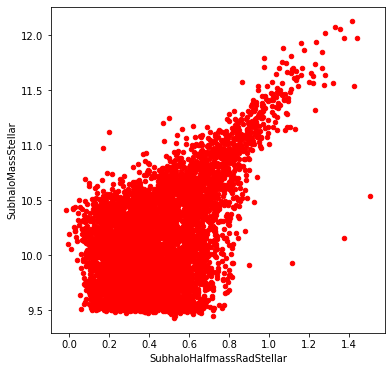

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
new_cat_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloHalfmassRadStellar", color = "red", ax = ax)

plt.show()

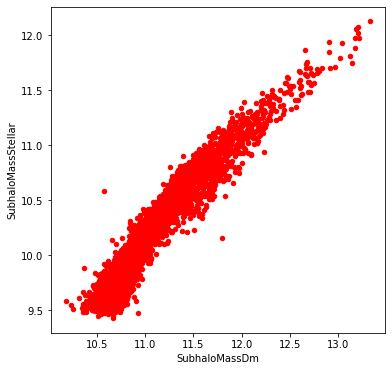

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
new_cat_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassDm", color = "red", ax = ax)

plt.show()

In [17]:
print(len(new_cat["SubhaloMassStellar"]))

5855
